# Proyecto II: Análisis de mercado inmobiliario

## 1. Problema

Después de haber entregado con éxito el primer proyecto se requiere mejorar los resultados.
Para ello se debe incorporar las técnicas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados) para generar un modelo que tenga un mejor desempeño que el desarrollado en el proyecto anterior.

## 2. Hipótesis

Al incorporar nuevas técnicas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados) se lograra obtener mejor resultados en la predicción del precio a los obtenidos en el primer proyecto y esto se vera reflejado en un mejor r2 y un menor RMSE.

## 3. Resultados previos

Se presentaran los modelos y resultados obtenidos del primer proyecto para tener como punto de comparación

### 3.1. Importar librerías y Datos

In [1]:
# Importamos las principales Librerías que utilizaremos para este proyecto
import numpy as np                                 # Operaciones matemáticas
import pandas as pd                                # Procesamiento de Datos
import matplotlib.pyplot as plt                    # Visualización de datos
import seaborn as sns                              # Visualización de datos
sns.set()                                          # Aspecto de los gráficos de seaborn
from sklearn.metrics import r2_score               # Métrica para evaluar los modelos 
from sklearn.metrics import mean_squared_error     # Métrica para evaluar los modelos 
from sklearn.model_selection import GridSearchCV   # Optimización Hiperparámetros
from matplotlib.ticker import (MultipleLocator)    # Complemento para histogramas

In [2]:
# Lectura de datos
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.to_feather('DS_Proyecto_01_Datos_Properati.feather')

### 3.2. Filtrado de datos
Aplicamos el filtrado de datos que utilizamos en el proyecto anterior

In [3]:
data = data[
            data.l2.isin(['Capital Federal']) &
            data.property_type.isin(['Departamento', 'Casa', 'PH']) &
            (data.surface_total <= 1000)  &
            (data.surface_total >= 15) &
            (data.price <= 4000000)
            ]
data = data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered' , 'price']]
data=data[~(data.isna().T.any())]
display(data.isna().sum())
display(data.shape)

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

(81019, 6)

In [4]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


### 3.3. Selección de variables y split de los datos
Seleccionamos las variables predictoras `X` y la variable a predecir `y`.

In [5]:
X=data.drop(columns=['price'])
y=data['price']

* Realizamos un Train/Test split de los datos.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
data_split_list=[X_train, X_test, y_train, y_test]

### 3.4. Entrenamiento de modelos

In [7]:
df_resultados = pd.DataFrame(columns=['modelo', 'dataset','subset','r2', 'rmse'])

In [8]:
df_resultados

,modelo,dataset,subset,r2,rmse


In [9]:
def fit_predict_measure(model, model_name, data_split_list, df_resultados, dataset='original'):
    
    X_train, X_test, y_train, y_test=data_split_list 
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    a_subset= 'train'
    a_r2=r2_score(y_train, y_train_pred)
    a_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    a_series= pd.Series([model_name,dataset,a_subset,a_r2,a_rmse], index = df_resultados.columns)
    df_resultados=df_resultados.append(a_series, ignore_index=True)
    
    a_subset= 'test'
    a_r2=r2_score(y_test, y_test_pred)
    a_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    a_series= pd.Series([model_name,dataset,a_subset,a_r2,a_rmse], index = df_resultados.columns)
    df_resultados=df_resultados.append(a_series, ignore_index=True)
    return df_resultados

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
knnr = KNeighborsRegressor(n_neighbors=5)

dtr_b= DecisionTreeRegressor(random_state=42, max_depth=17)
knnr_b= KNeighborsRegressor(n_neighbors= 3)

lista_modelos=[lr, dtr, knnr, dtr_b, knnr_b]
lista_nombre_modelos=['Linear Reg',
                      'DecisionTree Reg',
                      'KNeighbors Reg',
                      'DecisionTree Reg-Opt',
                      'KNeighbors Reg-Opt',
                     ]

for i, model in enumerate(lista_modelos):
    df_resultados=fit_predict_measure(model, lista_nombre_modelos[i], data_split_list, df_resultados)

### 3.5. Resumen de resultados previos

In [11]:
df_resultados.pivot(index='modelo', columns='subset', values=['r2', 'rmse'])

r2                     rmse               
subset                    test     train           test          train
modelo                                                                
DecisionTree Reg      0.747078  0.968905  152027.476038   52460.908773
DecisionTree Reg-Opt  0.766439  0.952673  146092.758486   64721.069773
KNeighbors Reg        0.736954  0.833758  155040.133290  121300.240494
KNeighbors Reg-Opt    0.746111  0.878256  152317.822290  103804.208527
Linear Reg            0.551486  0.551789  202449.365404  199173.832535

In [12]:
df_resultados

,modelo,dataset,subset,r2,rmse
0,Linear Reg,original,train,0.551789,199173.832535
1,Linear Reg,original,test,0.551486,202449.365404
2,DecisionTree Reg,original,train,0.968905,52460.908773
3,DecisionTree Reg,original,test,0.747078,152027.476038
4,KNeighbors Reg,original,train,0.833758,121300.240494
5,KNeighbors Reg,original,test,0.736954,155040.133290
6,DecisionTree Reg-Opt,original,train,0.952673,64721.069773
7,DecisionTree Reg-Opt,original,test,0.766439,146092.758486
8,KNeighbors Reg-Opt,original,train,0.878256,103804.208527
9,KNeighbors Reg-Opt,original,test,0.746111,152317.822290


In [13]:
def show_values_horizontal(ax,fig,offset= (-50, 15)):
    #funcion para poner los valores de las barras
    for p in ax.patches:
        value=format(p.get_width(), '.3f')
        _x = p.get_x() + p.get_width() 
        _y = p.get_y() + p.get_height()
        ax.annotate(value, (_x, _y), size=12,
                       xytext = offset, textcoords = 'offset points'  ## el offset
                  )
        fig

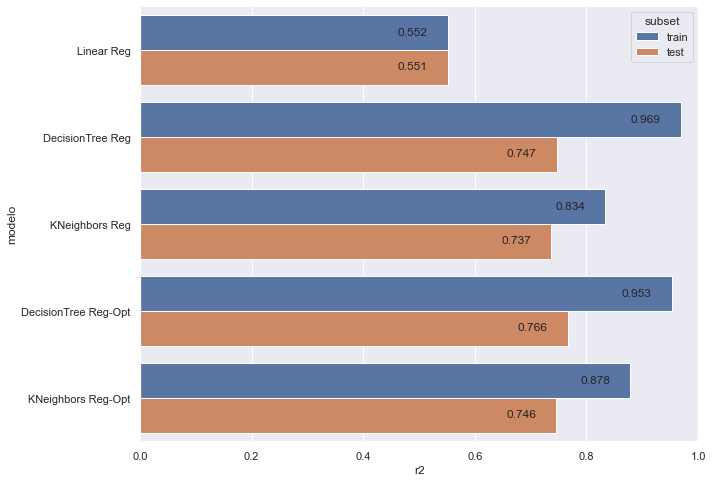

In [14]:
fig=plt.figure(figsize=(10, 8))
a=sns.barplot(y="modelo", 
            x="r2", 
            hue="subset",
            data=df_resultados[df_resultados.dataset=='original'])

a.set_xlim(0,1)
show_values_horizontal(a, fig)

## 4. Análisis Exploratorio de Datos

Vamos a analizar como están distribuidas las variables del dataset que habíamos filtrado.

In [15]:
cf_dis = ['rooms', 'bedrooms', 'bathrooms']
cf_cont= ['surface_total', 'surface_covered', 'price']
cf_dis_es = ['espacios', 'habitaciones', 'baños']
cf_cont_es= ['superficie_total', 'superficie_cubierta', 'precio']
cf_cont_u= ['m2', 'm2', 'USD']
colors_1= ['tab:blue','tab:orange','tab:green']
colors_2=['tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

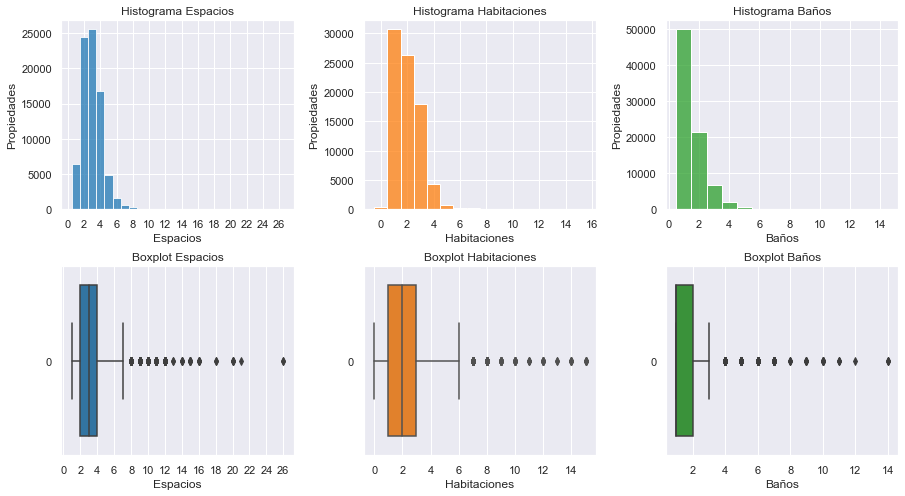

In [16]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.3, hspace= 0.3)
for item in enumerate(cf_dis):   
    sns.histplot(data=data[item[1]], discrete=True, ax=ax[0,item[0]], color=colors_1[item[0]])
    ax[0,item[0]].xaxis.set_major_locator(MultipleLocator(2))
    ax[0,item[0]].set_title(f'Histograma {cf_dis_es[item[0]].title()}')
    ax[0,item[0]].set_ylabel('Propiedades')
    ax[0,item[0]].set_xlabel(f'{cf_dis_es[item[0]].title()}' )
    
    sns.boxplot(data=data[item[1]], orient='h' , ax=ax[1,item[0]], color=colors_1[item[0]] )
    ax[1,item[0]].xaxis.set_major_locator(MultipleLocator(2))
    ax[1,item[0]].set_title(f'Boxplot {cf_dis_es[item[0]].title()}')
    ax[1,item[0]].set_xlabel(f'{cf_dis_es[item[0]].title()}')
    
plt.savefig('imagenes/discretas_antes.png', dpi=600, bbox_inches='tight', pad_inches=0.3)
plt.show()

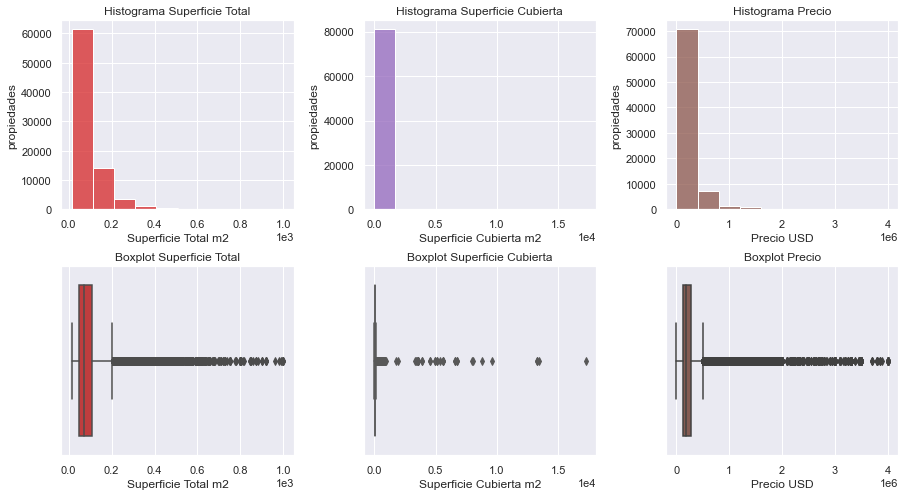

In [17]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.3, hspace= 0.3)
for item in enumerate(cf_cont):
    sns.histplot(data=data, x=item[1], bins=10, ax=ax[0, item[0]], color=colors_2[item[0]])
    ax[0,item[0]].set_title(f'Histograma {cf_cont_es[item[0]].title().replace("_", " ")}')
    ax[0,item[0]].set_ylabel('propiedades')
    ax[0,item[0]].set_xlabel(f'{cf_cont_es[item[0]].title().replace("_", " ")} {cf_cont_u[item[0]]}' )
    ax[0,item[0]].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    sns.boxplot(data=data, x=item[1], ax= ax[1,item[0]], color=colors_2[item[0]])
    ax[1,item[0]].set_title(f'Boxplot {cf_cont_es[item[0]].title().replace("_", " ")}')
    ax[1,item[0]].set_xlabel(f'{cf_cont_es[item[0]].title().replace("_", " ")} {cf_cont_u[item[0]]}' )
    ax[1,item[0]].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.savefig('imagenes/continuas_antes.png', dpi=600, bbox_inches='tight', pad_inches=0.3)    
plt.show()

* Se puede observar que el filtrado de datos no fue el mas adecuado y aun se presentan gran cantidad de valores atípicos en todas las variables.

In [18]:
data.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

* Adicionalmente con el filtrado realizado se han eliminado todos los inmuebles que contienen valores faltantes.

## 5. Transformación de datos

Volveremos cargar nuestro data set pero aplicaremos una estrategia diferente de filtrado.
* Para los valores faltantes realizaremos imputación mediante knn imputer
* Para eliminación de valores atípicos utilizaremos filtrado de 3 sigmas
* Se tendrá en cuenta las variables property_type y l3 por lo cual se les realizara encoding para poder utilizarlas en el modelado.


In [19]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

* Seguiremos trabajando con los inmuebles tipo vivienda de Capital Federal

In [20]:
data = data[data.l2.isin(['Capital Federal']) &
            data.property_type.isin(['Departamento', 'Casa', 'PH']) 
            ]
data = data[['price', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type','l3','title']]
data=data[~(data.surface_covered>data.surface_total)]
data.shape

(90725, 9)

### 5.1. Eliminación de Outliers

* Para la detección y eliminación de outliers se creara una función que nos separa los outliers con el criterio de las 3 sigmas, adicionalmente se puede mantener los datos nulos y escoger el numero de sigmas a utilizar.

In [21]:
def sigma_filter(X, s=3, keep_NaN= True):
    median=X.median()
    std=X.std()
    mask = (X<= median + s*std) & (X>= median - s*std)
    if keep_NaN:
        mask = mask | X.isna()
    return mask

In [22]:
mask= (sigma_filter(data['surface_total'])
       & sigma_filter(data['surface_covered'])
       & sigma_filter(data['price'])
       & sigma_filter(data['rooms'])  
       & sigma_filter(data['bedrooms'])
       & sigma_filter(data['bathrooms'])
      )
print(mask.mean())
data_f=data[mask]
data_f=data_f.reset_index(drop=True)
print(data_f.shape)

0.9435546982639845
(85604, 9)


* Haciendo el filtrado el dataset se conserva en un 94%.

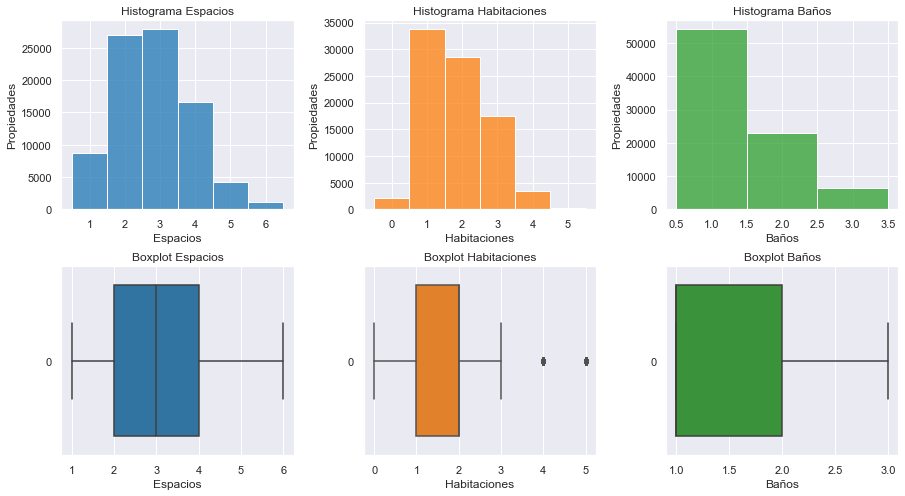

In [23]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.3, hspace= 0.3)
for item in enumerate(cf_dis):   
    sns.histplot(data=data_f[item[1]], discrete=True, ax=ax[0,item[0]], color=colors_1[item[0]])
    ax[0,item[0]].set_title(f'Histograma {cf_dis_es[item[0]].title()}')
    ax[0,item[0]].set_ylabel('Propiedades')
    ax[0,item[0]].set_xlabel(f'{cf_dis_es[item[0]].title()}' )
    
    sns.boxplot(data=data_f[item[1]], orient='h' , ax=ax[1,item[0]], color=colors_1[item[0]] )
    ax[1,item[0]].set_title(f'Boxplot {cf_dis_es[item[0]].title()}')
    ax[1,item[0]].set_xlabel(f'{cf_dis_es[item[0]].title()}')
    
plt.show()

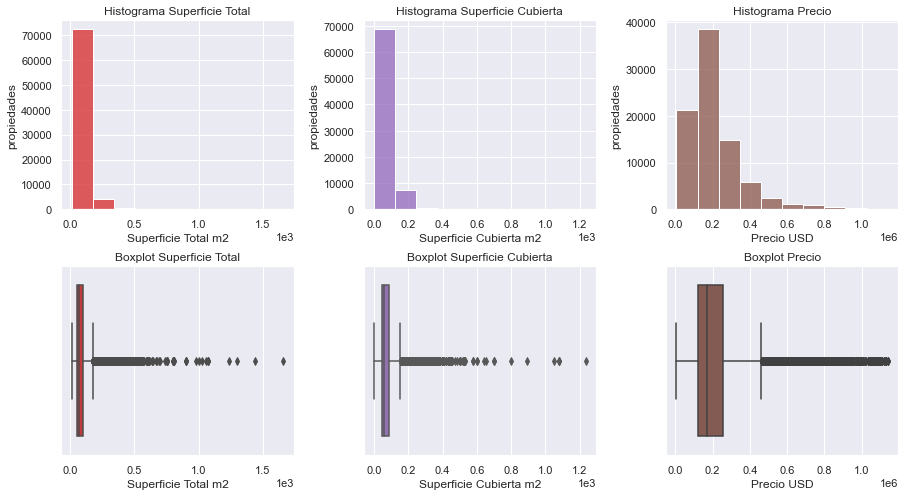

In [24]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.3, hspace= 0.3)
for item in enumerate(cf_cont):
    sns.histplot(data=data_f, x=item[1], bins=10, ax=ax[0, item[0]], color=colors_2[item[0]])
    ax[0,item[0]].set_title(f'Histograma {cf_cont_es[item[0]].title().replace("_", " ")}')
    ax[0,item[0]].set_ylabel('propiedades')
    ax[0,item[0]].set_xlabel(f'{cf_cont_es[item[0]].title().replace("_", " ")} {cf_cont_u[item[0]]}' )
    ax[0,item[0]].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    sns.boxplot(data=data_f, x=item[1], ax= ax[1,item[0]], color=colors_2[item[0]])
    ax[1,item[0]].set_title(f'Boxplot {cf_cont_es[item[0]].title().replace("_", " ")}')
    ax[1,item[0]].set_xlabel(f'{cf_cont_es[item[0]].title().replace("_", " ")} {cf_cont_u[item[0]]}' )
    ax[1,item[0]].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
plt.show()

* Con el filtrado de las 3 sigmas las variables discretas reducen considerablemente la cantidad de datos atípicos pero para las variables continuas al tener tanta desviación no se logra eliminar suficientes datos atípicos por lo que se rehace el filtrado pero esta vez con 1 sigmas para las superficies y 2 sigmas para el precio.

In [25]:
mask= (sigma_filter(data['surface_total'], s=1)
       & sigma_filter(data['surface_covered'], s=1)
       & sigma_filter(data['price'],s=2)
       & sigma_filter(data['rooms'])  
       & sigma_filter(data['bedrooms'])
       & sigma_filter(data['bathrooms'])
      )
print(mask.mean())
data_f=data[mask]
data_f=data_f.reset_index(drop=True)
print(data_f.shape)

0.9344171948195095
(84775, 9)


* Se sigue conservando un porcentaje elevado del dataset 93%

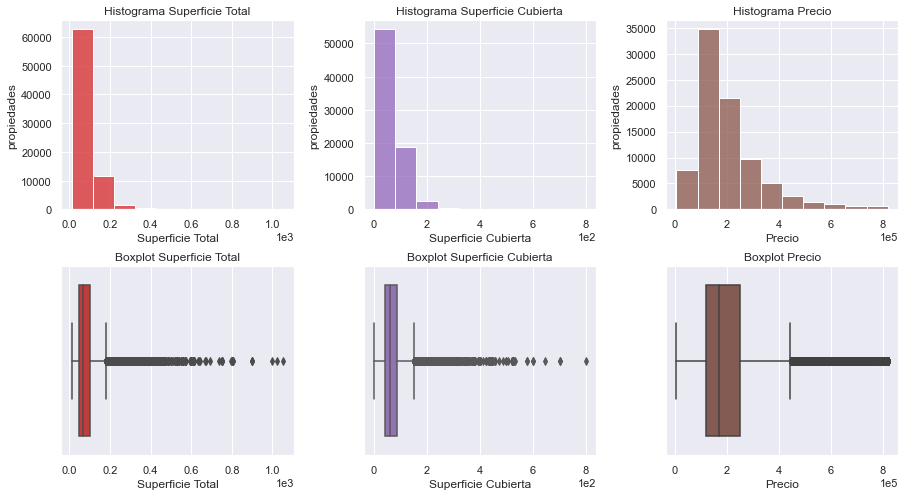

In [26]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.3, hspace= 0.3)
for item in enumerate(cf_cont):
    sns.histplot(data=data_f, x=item[1], bins=10, ax=ax[0, item[0]], color=colors_2[item[0]])
    ax[0,item[0]].set_title(f'Histograma {cf_cont_es[item[0]].title().replace("_", " ")}')
    ax[0,item[0]].set_ylabel('propiedades')
    ax[0,item[0]].set_xlabel(f'{cf_cont_es[item[0]].title().replace("_", " ")}' )
    ax[0,item[0]].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    sns.boxplot(data=data_f, x=item[1], ax= ax[1,item[0]], color=colors_2[item[0]])
    ax[1,item[0]].set_title(f'Boxplot {cf_cont_es[item[0]].title().replace("_", " ")}')
    ax[1,item[0]].set_xlabel(f'{cf_cont_es[item[0]].title().replace("_", " ")}' )
    ax[1,item[0]].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
plt.show()

* Con los nuevos sigmas elegidos para filtrar las variables continuas tenemos una mayor eliminación de valores atípicos sin reducir considerablemente el dataset

In [27]:
data_f.describe()

,price,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,84775.000000,84775.000000,84775.000000,82658.000000,76346.000000,76040.000000
mean,206762.103592,2.802784,1.839457,1.419923,83.799583,71.846883
std,129378.545770,1.090410,0.928883,0.625567,57.385870,42.630834
min,6000.000000,1.000000,0.000000,1.000000,12.000000,1.000000
25%,119500.000000,2.000000,1.000000,1.000000,48.000000,43.000000
50%,169000.000000,3.000000,2.000000,1.000000,68.000000,60.000000
75%,250000.000000,4.000000,2.000000,2.000000,100.000000,86.000000
max,820000.000000,6.000000,5.000000,3.000000,1054.000000,798.000000


* No tienen sentido superficies cubiertas de 1 mt por lo que revisaremos estos inmuebles

In [28]:
data_f[data_f.surface_covered<=15]

,price,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,l3,title
282,27000.0,1.0,1.0,NaN,14.0,14.0,Departamento,Caballito,"EXCELENTE COCHERA, EXCELENTE INVERSION !"
813,115000.0,1.0,1.0,1.0,33.0,3.0,Departamento,Belgrano,Excelente monoambiente a estrenar al frente co...
1578,236000.0,3.0,2.0,1.0,NaN,1.0,Departamento,Palermo,3 Ambientes a estrenar c/ cochera y parrilla e...
3291,210000.0,3.0,2.0,2.0,71.0,3.0,Departamento,Barracas,DEPARTAMENTO EN VENTA
3720,380000.0,5.0,4.0,3.0,NaN,1.0,PH,Almagro,PH 5 Ambientes con Terraza propia y Patio!
...,...,...,...,...,...,...,...,...,...
78287,259000.0,4.0,3.0,2.0,NaN,1.0,PH,Villa Urquiza,Ph en 2 plantas a refaccionar
78288,155000.0,2.0,1.0,1.0,NaN,1.0,Departamento,Villa Urquiza,2 AMBIENTES DE CATEGORIA A ESTRENAR
78289,295000.0,4.0,3.0,2.0,NaN,1.0,Departamento,Villa Urquiza,Departamento de 4 ambientes al frente con balc...
78290,129900.0,2.0,1.0,1.0,NaN,1.0,Departamento,Villa Urquiza,Departamento de 2 ambientes al frente con balcón


* Son pocos estos inmuebles que muy posiblemente tengan un error de digitación en la superficie cubierta por lo que borraremos estos valores y luego los imputaremos

In [29]:
data_f.loc[data_f['surface_covered'] <=15, 'surface_covered'] = np.nan

In [30]:
data_f.describe()

,price,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,84775.000000,84775.000000,84775.000000,82658.000000,76346.000000,75939.000000
mean,206762.103592,2.802784,1.839457,1.419923,83.799583,71.934131
std,129378.545770,1.090410,0.928883,0.625567,57.385870,42.591398
min,6000.000000,1.000000,0.000000,1.000000,12.000000,16.000000
25%,119500.000000,2.000000,1.000000,1.000000,48.000000,44.000000
50%,169000.000000,3.000000,2.000000,1.000000,68.000000,60.000000
75%,250000.000000,4.000000,2.000000,2.000000,100.000000,86.000000
max,820000.000000,6.000000,5.000000,3.000000,1054.000000,798.000000


In [31]:
data_f.isna().sum()

price                 0
rooms                 0
bedrooms              0
bathrooms          2117
surface_total      8429
surface_covered    8836
property_type         0
l3                    0
title                 0
dtype: int64

* Con esta eliminacion de valores atipicos se espera que mejoren los modelos predictivos

### 5.2. Realizamos un Train/Test split de los datos.

In [32]:
X=data_f.drop(columns=['price', 'title'])
y=data_f['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [33]:
X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,l3
12004,2.0,1.0,1.0,44.0,44.0,Departamento,Once
52994,3.0,2.0,2.0,76.0,76.0,Departamento,Once
75241,2.0,1.0,1.0,50.0,50.0,Departamento,Once
76347,5.0,3.0,2.0,280.0,180.0,Casa,Villa Devoto
71512,5.0,4.0,3.0,120.0,120.0,Departamento,Palermo
...,...,...,...,...,...,...,...
6265,3.0,2.0,2.0,115.0,109.0,Departamento,Recoleta
54886,3.0,2.0,1.0,70.0,50.0,PH,Palermo
76820,2.0,1.0,1.0,32.0,32.0,Departamento,Almagro
860,3.0,2.0,1.0,90.0,70.0,PH,Caballito


In [34]:
X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,l3
75816,3.0,2.0,1.0,57.0,50.0,Departamento,Villa Lugano
10592,3.0,2.0,1.0,45.0,35.0,Departamento,Almagro
71317,3.0,2.0,1.0,72.0,55.0,Departamento,Villa Crespo
4088,2.0,1.0,1.0,48.0,45.0,Departamento,Villa Crespo
42263,3.0,2.0,2.0,124.0,124.0,PH,Balvanera
...,...,...,...,...,...,...,...
45087,2.0,1.0,1.0,40.0,40.0,Departamento,San Nicolás
33829,3.0,2.0,2.0,82.0,82.0,Departamento,Recoleta
48307,2.0,1.0,1.0,44.0,44.0,PH,Palermo
66782,2.0,1.0,1.0,46.0,40.0,Departamento,Palermo


### 5.3. Encoding variables

Tenemos dos variables categoricas `property_type` y `l3`

In [35]:
print('valores únicos property_type:',X_train.property_type.unique().size)
print('valores únicos l3: ',X_train.l3.unique().size)

valores únicos property_type: 3
valores únicos l3:  57


* Para la variable `property_type` se tienen `3` posibles valores por lo que el modelo adecuado es `OneHotEncoder`
* Para la variable `l3` se tienen `57` posibles valores por lo que OneHotEncoder crearía muchas nuevas dimensiones en el dataset y tendría un mayor costo computacional procesarlo, por lo tanto seria recomendable utilizar un `LabelEncoder` que no genera dimensiones adicionales. No obstante se cuenta con la capacidad de procesamiento necesaria para utilizar `OneHotEncoder`  y se elige este para evitar que el modelo entienda los números como un tipo de orden como sucede en el `LabelEncoder`

* Se realizara el encoding de las variables `property_type` y `l3` mediante OneHotEncoder

In [36]:
from sklearn.preprocessing import OneHotEncoder
X_train_encode= X_train[['property_type','l3']]

In [37]:
X_train_encode

,property_type,l3
12004,Departamento,Once
52994,Departamento,Once
75241,Departamento,Once
76347,Casa,Villa Devoto
71512,Departamento,Palermo
...,...,...
6265,Departamento,Recoleta
54886,PH,Palermo
76820,Departamento,Almagro
860,PH,Caballito


In [38]:
one=OneHotEncoder(handle_unknown='ignore')
X_train_encode=pd.DataFrame(one.fit_transform(X_train_encode).toarray())

In [39]:
##Guardamos las categorias en una lista
cat_names=list(one.categories_[0])
cat_names.extend(list(one.categories_[1]))

In [40]:
X_train_encode.columns=cat_names
X_train_encode

,Casa,Departamento,PH,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59339,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59340,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Ya se tienen las variables con encoding guardadas en `data_encoded`, seguimos con el escalado, sacamos del dataset estas variables categóricas y no agregamos aun el encoding ya que este no necesita re-escalado.

In [41]:
X_train=X_train.drop(['property_type','l3'],1)

### 5.4. Escalado de datos

* Separamos nuestras variables predictoras y las escalamos.
* No podemos escalar la variable objetivo para poder comparar RMSE con los modelos anteriores.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

### 5.3. Imputación de valores faltantes

* Con los datos escalados procedemos a realizar la imputación de valores faltantes con `KNNImputer`

In [44]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

* Verificamos que nuestros nuevos datos no tengan valores nulos

In [45]:
X_train.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
dtype: int64

* Unimos las variables predictoras con el encoding para posteriormente hacer el modelado.

In [46]:
X_train=X_train.join(X_train_encode)

In [47]:
X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Abasto,Agronomía,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-0.740615,-0.908083,-0.673319,-0.696628,-0.658687,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.178986,0.170486,0.927047,-0.134290,0.097861,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.740615,-0.908083,-0.673319,-0.591190,-0.516834,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.018187,1.249054,0.927047,3.450616,2.556644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.018187,2.327623,2.527412,0.638925,1.138116,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,0.178986,0.170486,0.927047,0.551060,0.878052,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59338,0.178986,0.170486,-0.673319,-0.239729,-0.516834,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59339,-0.740615,-0.908083,-0.673319,-0.907505,-0.942393,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59340,0.178986,0.170486,-0.673319,0.111733,-0.043991,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.3. Aplicar transformacioens al test

In [48]:
X_test_encode= X_test[['property_type','l3']]
X_test_encode= pd.DataFrame(one.transform(X_test_encode).toarray())
X_test_encode.columns=cat_names
X_test= X_test.drop(['property_type','l3'],1)
X_test=pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test = pd.DataFrame(imputer.transform(X_test),columns = X_test.columns)
X_test=X_test.join(X_test_encode)

In [49]:
data_split_list=[X_train, X_test, y_train, y_test]

### 5.5. Modelado con nuevo dataset

* Entrenamos los modelos

In [50]:
for i, model in enumerate(lista_modelos):
    df_resultados=fit_predict_measure(model, lista_nombre_modelos[i], data_split_list, df_resultados, dataset='transformado')

* Mostramos los resultados tabulados

In [51]:
df_resultados[df_resultados.subset=='test'].pivot(index='modelo', columns='dataset', values=['r2', 'rmse'])

r2                        rmse              
dataset               original transformado       original  transformado
modelo                                                                  
DecisionTree Reg      0.747078     0.840396  152027.476038  52115.986474
DecisionTree Reg-Opt  0.766439     0.828859  146092.758486  53966.816515
KNeighbors Reg        0.736954     0.840041  155040.133290  52173.931767
KNeighbors Reg-Opt    0.746111     0.842394  152317.822290  51788.778298
Linear Reg            0.551486     0.734189  202449.365404  67256.771451

* Visualizamos graficamente los resultados de `r2` en el set de datos de test

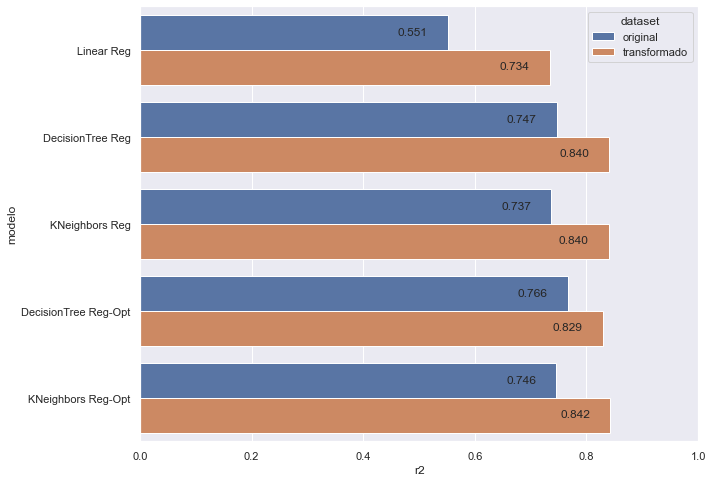

In [52]:
fig=plt.figure(figsize=(10, 8))
a=sns.barplot(y="modelo", 
            x="r2", 
            hue="dataset",
            data=df_resultados[df_resultados.subset=='test'])

a.set_xlim(0,1)
show_values_horizontal(a, fig)

Podemos ver que al utilizar los mismos modelos con los datos transformados nos lleva a mejorar notablemente el resultado. 
* Esto se debe a que ya contamos con un dataset con menos valores atípicos que reducen el rendimiento del modelo.
* La imputación de valores faltantes nos permite trabajar con set de datos mas grande lo que pudo contribuir al mejoramiento de los modelos.
* El encoding de las variables categóricas nos aporta nueva información que anteriormente no se tenia en cuenta por lo que podemos predecir de una mejor forma.
* El escalado de datos logra que modelos basados en distancia mejoren como es el caso de `KNeighborsRegressor` que tuvo un desempeño considerablemente superior con el nuevo set de datos.

# 6. Modelos Avanzados

* Como modelos avanzados se implementara primero un modelo de regresión polinómica (`LinearRegression` con atributos polinómicos `PolynomialFeatures` y regularización `Ridge`).
* Como segundo modelo se realizara potenciación del gradiente de arboles de decisión `XGBoost`

## 6.1. Polynomial Regression

In [53]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [54]:
# Solo se le aplicara el PolynomialFeatures a las variables que numericas por lo que las separamos de las demas
X_p = list(X_train.iloc[:, 0:5].columns)

In [55]:
# Creamos un column_transformer para aplicar PolynomialFeatures a las variables nuemricas
processor = make_column_transformer(
    (PolynomialFeatures(), X_p),
    remainder='passthrough')

In [56]:
# Creamos un pipe para combiar el preprocesamiento de PolynomialFeatures con el modelo LinearRegression y otro para un modelo con regularización Ridge.
polynomial_reg_linear = make_pipeline(
    processor,
    LinearRegression())

polynomial_reg_ridge = make_pipeline(
    processor,
    Ridge())

In [57]:
# Creamos los grid search para ambos modelos
param_grid_linear = {
    'columntransformer__polynomialfeatures__degree': [1,2,3,4,5],
    }

gs_polynomial_reg_linear = GridSearchCV(polynomial_reg_linear,
                        param_grid_linear,
                        cv = 5,
                        n_jobs = 12,
                        verbose=True)
param_grid_ridge = {
    'columntransformer__polynomialfeatures__degree': [1,2,3,4,5],
    'ridge__alpha':[0.0001,0.001,0.01,0.1,1,10,100]
    }

gs_polynomial_reg_ridge = GridSearchCV(polynomial_reg_ridge,
                        param_grid_ridge,
                        cv = 5,
                        n_jobs = 12,
                        verbose=True)

Se eligieron como hiperparámetros a ajustar el grado del polinomio y para el modelo con regularización el valor del alpha, el rango de valores escogido para el grado del polinomio fue de 1 a 5 ya que valores mayores solo aportarían sobre ajuste y para el alpha se escogieron un rango de valores en escala log basado en valores vistos en proyectos en la web.

In [58]:
# Entrenamos el primer modelo sin regularización
df_resultados=fit_predict_measure(gs_polynomial_reg_linear, 'Polynomial Regression', data_split_list, df_resultados, dataset='transformado')
gs_polynomial_reg_linear.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:    4.5s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=3),
                                                  ['rooms', 'bedrooms',
                                                   'bathrooms', 'surface_total',
                                                   'surface_covered'])])),
                ('linearregression', LinearRegression())])

In [59]:
## Guardamos el nombre de los coeficientes a los que se les aplico polynomialfeatures
coeficientes_name=gs_polynomial_reg_linear.best_estimator_[0].\
                    named_transformers_['polynomialfeatures'].get_feature_names()

In [60]:
## Ponemos el nombre correspondiente
coeficientes_name=[x.replace('x0','rooms')\
                   .replace('x1','bedrooms')\
                   .replace('x2','bathrooms')\
                   .replace('x3','surface_total')\
                   .replace('x4','surface_covered')\
                   for x in coeficientes_name]

In [61]:
## Agregamos el resto de columnas
coeficientes_name.extend(cat_names)

In [62]:
coeficientes=gs_polynomial_reg_linear.best_estimator_[1].coef_
coeficientes=abs(coeficientes)

In [63]:
pd.DataFrame(list(zip(coeficientes_name,coeficientes)), columns=['Nombre_Variable', 'Coeficiente']).\
        sort_values(by='Coeficiente', ascending=False).head(20)

,Nombre_Variable,Coeficiente
93,Puerto Madero,243919.931336
113,Villa Soldati,121622.996694
78,Las Cañitas,98946.496987
106,Villa Lugano,79090.107182
92,Pompeya,77055.620661
94,Recoleta,73172.995393
85,Palermo,71025.817000
65,Belgrano,69936.392788
5,surface_covered,66767.672165
83,Nuñez,60209.615868


Podemos ver que  de los 20 atributos con mayor importancia 18 corresponden a pertenecer a algún barrio y en los puestos 9 y 12 de importancia tenemos la superficie cubierta y la superficie total.

In [64]:
# Entrenamos el segundo modelo con regularización
df_resultados=fit_predict_measure(gs_polynomial_reg_ridge, 'Polynomial Regression Ridge', data_split_list, df_resultados, dataset='transformado')
gs_polynomial_reg_ridge.best_estimator_

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 175 out of 175 | elapsed:    8.6s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=3),
                                                  ['rooms', 'bedrooms',
                                                   'bathrooms', 'surface_total',
                                                   'surface_covered'])])),
                ('ridge', Ridge(alpha=0.1))])

In [65]:
## Guardamos el nombre de los coeficientes a los que se les aplico polynomialfeatures
coeficientes_name=gs_polynomial_reg_ridge.best_estimator_[0].\
                    named_transformers_['polynomialfeatures'].get_feature_names()

In [66]:
## Ponemos el nombre correspondiente
coeficientes_name=[x.replace('x0','rooms')\
                   .replace('x1','bedrooms')\
                   .replace('x2','bathrooms')\
                   .replace('x3','surface_total')\
                   .replace('x4','surface_covered')\
                   for x in coeficientes_name]

In [67]:
## Agregamos el resto de columnas
coeficientes_name.extend(cat_names)

In [68]:
coeficientes=gs_polynomial_reg_ridge.best_estimator_[1].coef_
coeficientes=abs(coeficientes)

In [69]:
pd.DataFrame(list(zip(coeficientes_name,coeficientes)), columns=['Nombre_Variable', 'Coeficiente']).\
        sort_values(by='Coeficiente', ascending=False).head(20)

,Nombre_Variable,Coeficiente
93,Puerto Madero,243841.943780
113,Villa Soldati,121388.838788
78,Las Cañitas,98886.128089
106,Villa Lugano,79098.559987
92,Pompeya,77038.691391
94,Recoleta,73134.796377
85,Palermo,70988.758989
65,Belgrano,69898.143891
5,surface_covered,66770.628100
83,Nuñez,60168.643404


Con regularización la importancia de los atributos sigue muy similar a la vista sin regularización

In [70]:
df_resultados[df_resultados.dataset=='transformado'].pivot(index='modelo', columns='subset', values=['r2', 'rmse'])

r2                    rmse              
subset                           test     train          test         train
modelo                                                                     
DecisionTree Reg             0.840396  0.968592  52115.986474  22846.831116
DecisionTree Reg-Opt         0.828859  0.902704  53966.816515  40211.578136
KNeighbors Reg               0.840041  0.889738  52173.931767  42807.118330
KNeighbors Reg-Opt           0.842394  0.911447  51788.778298  38362.209358
Linear Reg                   0.734189  0.736148  67256.771451  66218.978264
Polynomial Regression        0.765037  0.772720  63233.787505  61458.620616
Polynomial Regression Ridge  0.765042  0.772720  63233.177677  61458.622696

Observamos una mejora de la regresión polinómica con respecto a la lineal pero el efecto de la regularización no mejoro mucho el modelo, no obstante siguen siendo mejores el resto de modelos

In [71]:
lineal_models_list=['Linear Reg','Polynomial Regression','Polynomial Regression Ridge']

In [72]:
df_resultados[df_resultados.dataset=='transformado'].pivot(index='modelo', columns='subset', values=['r2', 'rmse'])

r2                    rmse              
subset                           test     train          test         train
modelo                                                                     
DecisionTree Reg             0.840396  0.968592  52115.986474  22846.831116
DecisionTree Reg-Opt         0.828859  0.902704  53966.816515  40211.578136
KNeighbors Reg               0.840041  0.889738  52173.931767  42807.118330
KNeighbors Reg-Opt           0.842394  0.911447  51788.778298  38362.209358
Linear Reg                   0.734189  0.736148  67256.771451  66218.978264
Polynomial Regression        0.765037  0.772720  63233.787505  61458.620616
Polynomial Regression Ridge  0.765042  0.772720  63233.177677  61458.622696

In [73]:
lineal_models=df_resultados[df_resultados.dataset=='transformado']
lineal_models=lineal_models[lineal_models.modelo.isin(lineal_models_list)]

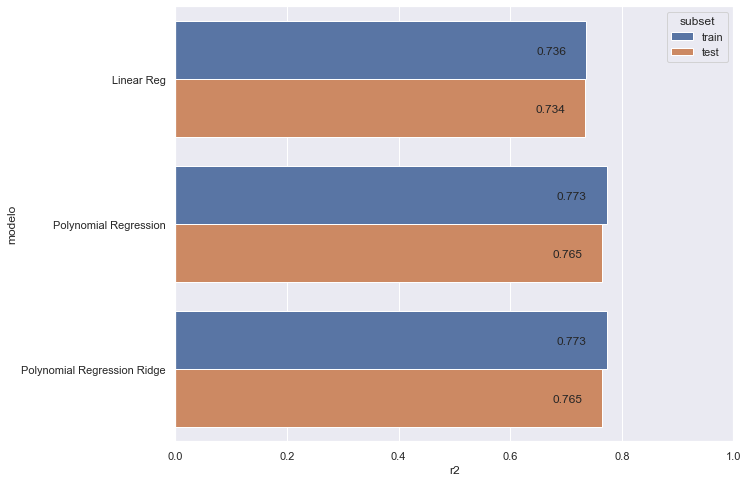

In [74]:
fig=plt.figure(figsize=(10, 8))
a=sns.barplot(y="modelo", 
            x="r2", 
            hue="subset",
            data=lineal_models)

a.set_xlim(0,1)
show_values_horizontal(a, fig,offset=(-50, 25))

## 6.2. XGBoost

In [75]:
import xgboost as xgb
tree_models_list=['DecisionTree Reg','DecisionTree Reg-Opt', 'XGBoost', 'XGBoost Opt']

El numero de estimadores es un parámetro que mejora tanto el desempeño en train como en test pero entre mas grande sea mas costo computacional tendrá por lo que se probara primero como este afecta el desempeño tanto en train como en test para elegir un valor que de un buen resultado sin demorar demasiado para poder ajustar el resto de parámetros mediante gridsearch

In [76]:
list_n_estimators= np.arange(100,1100,100)
list_r_train=[]
list_r_test=[]
for i in list_n_estimators:
    xg_reg = xgb.XGBRegressor(max_depth = 6, n_estimators = i , n_jobs=1, verbosity=1,
                          tree_method='hist')
    xg_reg.fit(X_train, y_train)
    y_train_pred = xg_reg.predict(X_train)
    y_test_pred = xg_reg.predict(X_test)
    list_r_train.append(r2_score(y_train, y_train_pred))
    list_r_test.append(r2_score(y_test, y_test_pred))

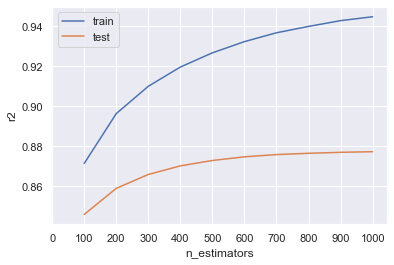

In [77]:
plt.figure()
plt.plot(list_n_estimators,list_r_train)
plt.plot(list_n_estimators,list_r_test)
plt.xticks(np.arange(0, 1100,step=100))
plt.ylabel('r2')
plt.xlabel('n_estimators')
plt.legend(['train','test'])
plt.show()

A partir de 700 estimadores las mejoras son minimas por lo que usaremos este valor para el gridsearch de los demas parametros

In [78]:
xg_reg = xgb.XGBRegressor(max_depth = 6, n_estimators = 700 , n_jobs=1, verbosity=1,
                          tree_method='hist')

In [79]:
df_resultados=fit_predict_measure(xg_reg, tree_models_list[2], data_split_list, df_resultados, dataset='transformado')

In [80]:
parameters = {
                'n_jobs':[1], #when use hyperthread, xgboost may become slower
                'learning_rate': [0.05, 0.15, 0.30 ] , #so called `eta` value
                'max_depth': [10,12,13],
                'verbosity': [1],
                'min_child_weight':[1, 3],
                'colsample_bytree': [0.7, 1.0 ],
                'n_estimators': [700],
                'tree_method':['hist']
             }

xgb_grid = GridSearchCV(xgb.XGBRegressor(),
                        parameters,
                        cv = 5,
                        n_jobs = 12,
                        verbose=True)

Se eligieron como parámetros a ajustar:
* **learning_rate:** es la velocidad de aprendizaje que al aumentar el modelo aprende mas rápido por lo que se ajusta mejor a los datos de entrenamiento.
* **max_depth:** es la profundidad máxima de los arboles que al aumentar la profundidad se ajusta mejor a los datos de entrenamiento.
* **min_child_weight:** es el numero mínimo de instancias que debe tener un árbol, si se llega a este numero el modelo dejara de construir nuevas separaciones. al aumentar ayuda a regularizar y evitar el sobre-ajuste.
* **colsample_bytree:** es la fracción de características (seleccionadas al azar) que se utilizarán para entrenar cada árbol al disminuir el numero de columnas se ayuda a regularizar y evitar el sobre-ajuste.

In [81]:
df_resultados=fit_predict_measure(xgb_grid, tree_models_list[3], data_split_list, df_resultados, dataset='transformado')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   43.5s
[Parallel(n_jobs=12)]: Done 180 out of 180 | elapsed:  3.8min finished


In [82]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=1)

Con el mejor modelo del gridsearch volvemos a analizar la cantidad de estimadores

In [83]:
list_n_estimators= np.arange(100,1500,100)
list_r_train=[]
list_r_test=[]
for i in list_n_estimators:
    xg_reg_opt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=13,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=i, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=1)

    
    xg_reg_opt.fit(X_train, y_train)
    y_train_pred = xg_reg_opt.predict(X_train)
    y_test_pred = xg_reg_opt.predict(X_test)
    list_r_train.append(r2_score(y_train, y_train_pred))
    list_r_test.append(r2_score(y_test, y_test_pred))

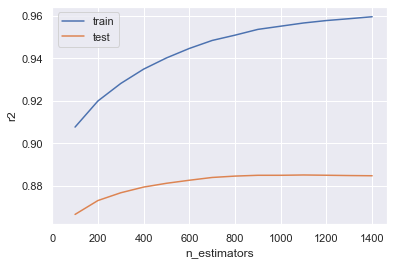

In [84]:
plt.figure()
plt.plot(list_n_estimators,list_r_train)
plt.plot(list_n_estimators,list_r_test)
plt.xticks(np.arange(0, 1500,step=200))
plt.ylabel('r2')
plt.xlabel('n_estimators')
plt.legend(['train','test'])
plt.show()

A partir de 1000 estimadores el desempeño en test es  casi igual por lo que usaremos el modelo con 1000 estimadores

In [85]:
xg_reg_opt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=13,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=1)

In [86]:
df_resultados=df_resultados[:-2]  # Eliminamos de la tabla los valores que vamos a remplazar
df_resultados=fit_predict_measure(xg_reg_opt, tree_models_list[3], data_split_list, df_resultados, dataset='transformado')

In [87]:
df_resultados[df_resultados.dataset=='transformado'].pivot(index='modelo', columns='subset', values=['r2', 'rmse'])

r2                    rmse              
subset                           test     train          test         train
modelo                                                                     
DecisionTree Reg             0.840396  0.968592  52115.986474  22846.831116
DecisionTree Reg-Opt         0.828859  0.902704  53966.816515  40211.578136
KNeighbors Reg               0.840041  0.889738  52173.931767  42807.118330
KNeighbors Reg-Opt           0.842394  0.911447  51788.778298  38362.209358
Linear Reg                   0.734189  0.736148  67256.771451  66218.978264
Polynomial Regression        0.765037  0.772720  63233.787505  61458.620616
Polynomial Regression Ridge  0.765042  0.772720  63233.177677  61458.622696
XGBoost                      0.875865  0.936830  45961.864755  32400.932164
XGBoost Opt                  0.885043  0.955070  44230.104516  27325.735196

In [88]:
tree_models=df_resultados[df_resultados.dataset=='transformado']
tree_models=tree_models[tree_models.modelo.isin(tree_models_list)]

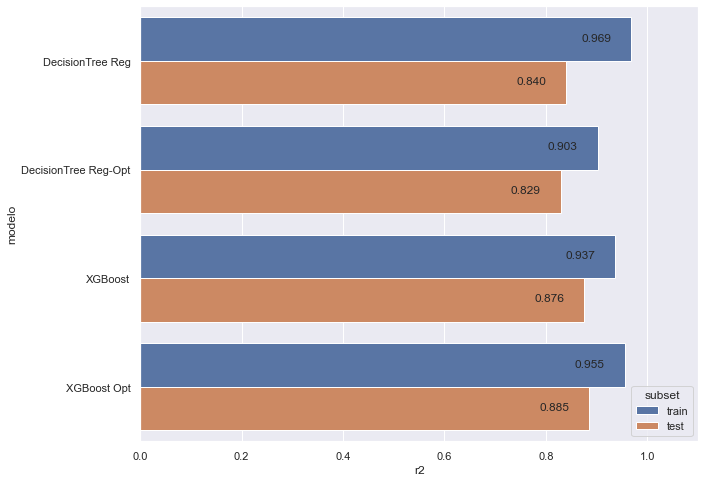

In [89]:
fig=plt.figure(figsize=(10, 8))
a=sns.barplot(y="modelo", 
            x="r2", 
            hue="subset",
            data=tree_models)

a.set_xlim(0,1.1)
show_values_horizontal(a, fig,offset=(-50, 20))

Como podemos observar el modelo XGBoost optimizado es el que obtuvo el mejor resultado entre todos los modelos probados

In [90]:
feature_importances_xgb=list(xg_reg_opt.feature_importances_)

In [91]:
feature_names_xgb=list(X_train.columns)

In [92]:
pd.DataFrame(list(zip(feature_names_xgb,feature_importances_xgb)), columns=['Nombre_Variable', 'Importancia']).\
        sort_values(by='Importancia', ascending=False).head(20)

,Nombre_Variable,Importancia
42,Puerto Madero,0.320946
27,Las Cañitas,0.058696
34,Palermo,0.049258
14,Belgrano,0.035234
43,Recoleta,0.032505
4,surface_covered,0.032181
55,Villa Lugano,0.023414
32,Nuñez,0.021107
62,Villa Soldati,0.019976
49,Tribunales,0.019055


En la tabla anterior podemos ver que hay varios barrios que tienen mucha importancia a la hora de definir el precio, también se puede ver como el área cubierta, total y el numero de baños se encuentran entre las variables mas importantes para el modelo lo que es de esperarse para este set de datos

## 6.3. Distribucion de errores modelos avanzados

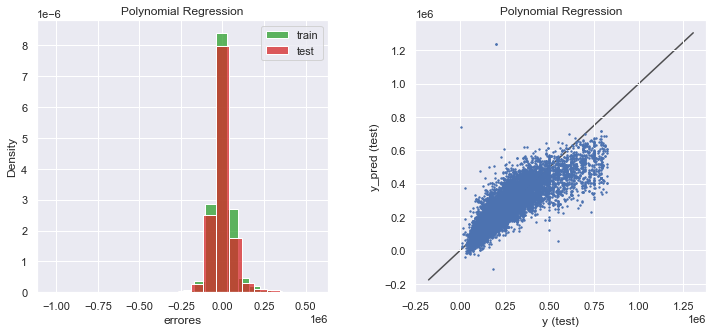

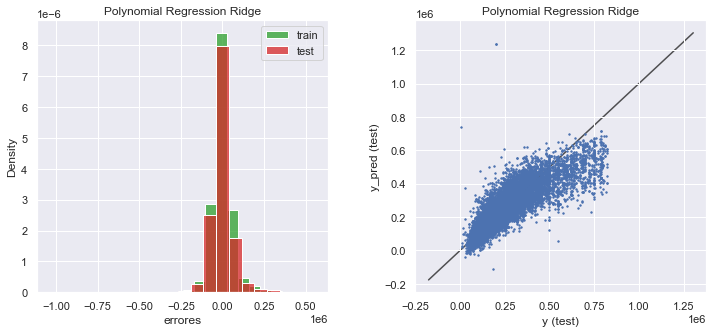

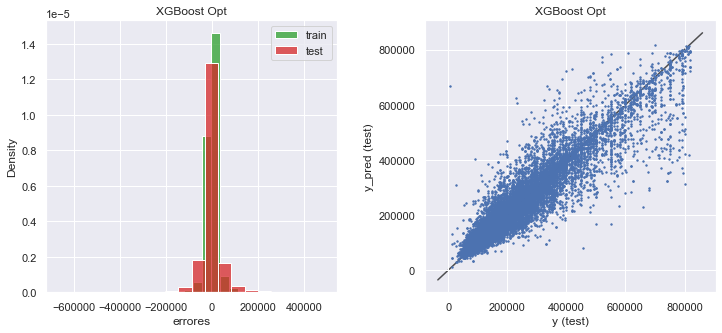

In [93]:
modelos = ['Polynomial Regression','Polynomial Regression Ridge', 'XGBoost Opt']
for i, model in enumerate([gs_polynomial_reg_linear,gs_polynomial_reg_ridge, xg_reg_opt]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    plt.subplots_adjust(wspace=0.3, hspace= 0.3)

    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', ax= ax[0], kde=False, color='tab:green', stat='density')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', ax= ax[0], kde=False, color='tab:red', stat='density')
    ax[0].set_xlabel('errores')
    ax[0].legend()
    ax[0].set_title(modelos[i])  

    ax[1].scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes]
    ]
    
    ax[1].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax[1].set_xlabel('y (test)')
    ax[1].set_ylabel('y_pred (test)')
    ax[1].set_title(modelos[i])  
    
    plt.show()

Podemos ver de las distribuciones de los errores que ambas regresiones polinómicas tienden a subestimar el precio de las propiedades de alto valor mientras que en el modelo XGBoost se observa que funciona adecuadamente para todo el rango de precios.

## 7. Conclusiones

* Con las mejoras implementadas al procesamiento de los datos se logro mejorar considerablemente el desempeño de los modelos anteriormente desarrollados.

* La inclusión de la variable barrio cambio significativamente los resultados y como pudimos observar en la importancia que le dio los modelos a pertenecer a algunos barrios, que esta información es fundamental para establecer un precio adecuado.

* De los modelos avanzados obtuvo mejor resultado el XGBoost optimizado superando a todos los demás modelos antes vistos

# 8. Mejoras

* En la columna descripción hay información que podría ser procesada mediante procesamiento del lenguaje natural para mejorar aun mas el modelo
* Se podrían analizar mas hiperparámetros que puedan mejorar el desempeño
* Se podria implementar una reducción de dimensionalidad para reducir la carga computacional.